In [26]:
import numpy as np
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_icrs_coordinates, AltAz
from astropy.coordinates import get_body_barycentric, get_body, get_moon
# t = Time.now()
t = Time('2020-09-20 16:00')
delta_times = np.linspace(0, 5, num=2000) * u.hr
times = t + delta_times
loc = EarthLocation.of_address('Pordenone, Italy')

from datetime import datetime
from astropy.time import TimezoneInfo
utc_plus_two_hours = TimezoneInfo(utc_offset=2*u.hour)

In [10]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

In [27]:
mizar = get_icrs_coordinates('Mizar')
alcor = get_icrs_coordinates('Alcor')
aa = AltAz(location=loc, obstime=t)
mizar.transform_to(aa)

<SkyCoord (AltAz: obstime=2020-09-20 16:00:00.000, location=(4333831.2033362, 973470.0255359, 4561868.2083341) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (304.54708799, 56.82045039)>

In [28]:
mizar.separation(alcor)

<Angle 0.19682972 deg>

In [29]:
aa_allnight = AltAz(location=loc, obstime=times)

In [30]:
with solar_system_ephemeris.set('builtin'):
    jupiter = get_body('jupiter', times, loc) 
aa_coordinates_jupiter = jupiter.transform_to(aa_allnight)
aa_coordinates_jupiter.secz

<Quantity [4.1874614 , 4.18308984, 4.17873129, ..., 4.49378068, 4.49911185,
           4.50446005]>

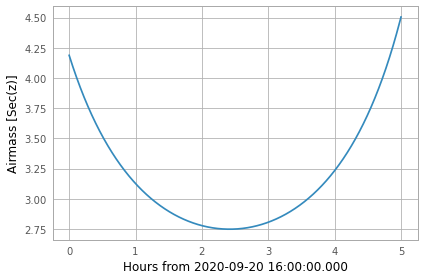

In [31]:
plt.plot(delta_times, aa_coordinates_jupiter.secz)
plt.xlabel(f'Hours from {t}')
plt.ylabel('Airmass [Sec(z)]')
plt.tight_layout()

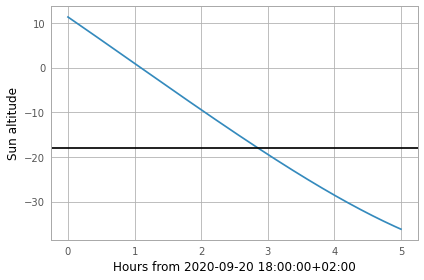

In [32]:
from astropy.coordinates import get_sun

sun_coords = get_sun(times).transform_to(aa_allnight)
plt.plot(delta_times, sun_coords.alt.deg)
plt.axhline(-18, color='k')
plt.xlabel(f'Hours from {t.to_datetime(timezone=utc_plus_two_hours)}')
plt.ylabel('Sun altitude')
plt.grid("on")
plt.tight_layout()

In [2]:
# when exactly is -18 degree twilight?
from astropy.coordinates import get_sun
from scipy.optimize import fsolve

def find_twilight(t0, loc=loc, thr = 18):
    def alt(deltat):
        t = t0 + deltat*u.hr
        sun_coords = get_sun(t).transform_to(AltAz(location=loc, obstime=t))
        return(sun_coords.alt.deg + thr)
    deltat_correct = fsolve(alt, 0)
    return(t0 + deltat_correct*u.hr)

In [11]:
print(find_twilight(t).to_datetime(timezone=utc_plus_two_hours))

[datetime.datetime(2020, 9, 19, 20, 53, 27, 46039, tzinfo=<astropy.time.formats.TimezoneInfo object at 0x7fec57da5b50>)]


GeodeticLocation(lon=<Longitude 12.6597197 deg>, lat=<Latitude 45.9562503 deg>, height=<Quantity -1.37567378e-09 m>)